# LinearRegression, KNN

# mean_absolute_error, r2_score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

In [3]:
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [4]:
# 전날 값으로 결측치 채우기
data.fillna(method='ffill', inplace=True)
# 확인
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [5]:
# 불필요한 변수 제거
col_x = ['Month', 'Day']
data.drop(col_x, axis=1, inplace=True)
# 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56


In [6]:
target = 'Ozone'
x = data.drop(target, axis=1)
y = data.loc[:, target]
# 정규화
x = (x - x.min()) / (x.max() - x.min())

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    random_state=2022)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error # 평균 절대값 오차
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(mean_absolute_error(y_test, y_pred))

13.377390093696073


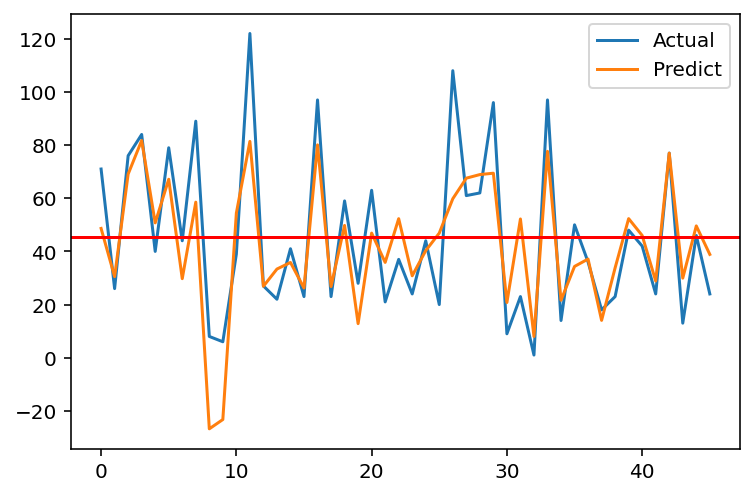

In [10]:
mean_ozone = y_test.values.mean()
plt.plot(y_test.values)
plt.plot(y_pred)
plt.axhline(mean_ozone, color='r')
plt.legend(['Actual', 'Predict'])
plt.show()

In [11]:
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 298.7074379241614


In [12]:
# RMSE Root Mean Squared Error
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)

RMSE: 17.2831547445529


In [13]:
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.6789087709628865


In [14]:
print('R2 Score:', r2_score(y_test, y_pred))

R2 Score: 0.6673645301519779


In [15]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 10.079710144927535
R2-Score : 0.8048728545593832


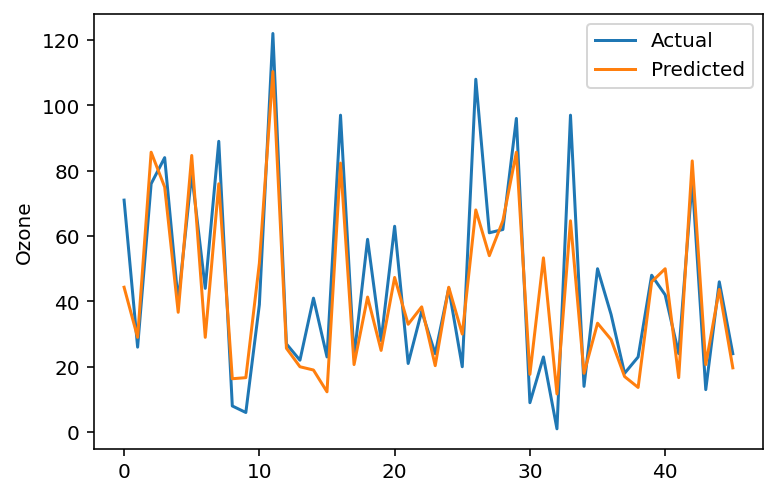

In [16]:
# 예측값, 실제값 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.ylabel('Ozone')
plt.show()